# Modelle der Informatik - Kapitel 6: Machine Learning
## Übungsblatt 2: Entscheidungsbäume & Unsupervised Learning

## Entscheidungsbäume

In diesem Übungsblatt betrachten wir die Klassifikation verschiedener Pflanzenarten anhand ihrer Blattlängen (petal length) und -breiten (petal width). Dabei werden die Pflanzenfamilien Iris-Setosa, Iris-Versicolor und Iris-Virginica unterschieden.

**1.  Was lernt ein Entscheidungsbaum, um Datenpunkte verschiedenen Klassen zuordnen zu können? **


ANTWORT...

**2. Lernen Entscheidungsbäume Merkmale (Features)? Erläutern Sie Ihre Antwort. **


ANTWORT...

In der folgenden Zelle wird ein Entscheidungsbaum trainiert, um die drei Pflanzenarten zu klassifizieren:

In [6]:
from sklearn import datasets
iris = datasets.load_iris()
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
iris = datasets.load_iris()
X_t = iris.data[:, 2:] # petal length and width
y_t = iris.target
%pip install -q pydot
import matplotlib.pyplot as plt2
%matplotlib inline

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_t, y_t)

from IPython.display import SVG
from graphviz import Source
graph = Source( export_graphviz(tree_clf, out_file=None, 
                feature_names=iris.feature_names[2:], 
                class_names=iris.target_names, rounded=True, 
                filled=True))
SVG(graph.pipe(format='svg')) 

Note: you may need to restart the kernel to use updated packages.


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

** 3. Beschreiben Sie die Abbildung. Was fällt Ihnen auf? **

ANTWORT...


** 4. Wie schätzen Sie die Generalisierungsfähigkeit des Modells ein? Begründen Sie Ihre Antwort. Was könnten Sie tun, um diese zu verbessern? **

ANTWORT...

In [7]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_t, y_t)

from IPython.display import SVG
from graphviz import Source
graph = Source( export_graphviz(tree_clf, out_file=None, 
                feature_names=iris.feature_names[2:], 
                class_names=iris.target_names, rounded=True, 
                filled=True))
SVG(graph.pipe(format='svg')) 

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

** 5. Vergleiche Sie die beiden Modelle. Welches würden Sie auswählen? Warum? **

ANTWORT...

** 6. Die folgende Zelle visualisiert den zweiten Entscheidungsbaum im Feature-Space. Interpretieren Sie die Abbildung.**

ANTWORT...

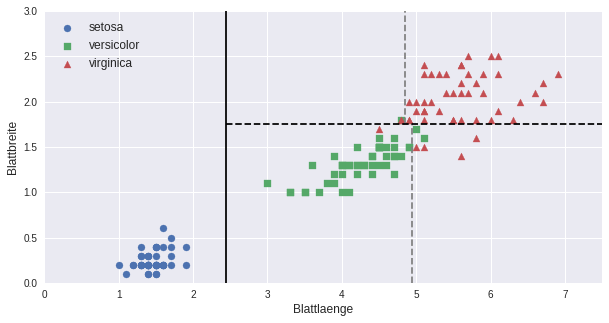

In [ ]:
c0 = X_t[y_t==0]
c1 = X_t[y_t==1]
c2 = X_t[y_t==2]

plt2.figure(figsize=(10, 5))
plt2.xlim((0, 7.5))
plt2.ylim((0, 3))
plt2.scatter(c0[:, 0], c0[:, 1], marker='o', label=iris.target_names[0])
plt2.scatter(c1[:, 0], c1[:, 1], marker='s', label=iris.target_names[1])
plt2.scatter(c2[:, 0], c2[:, 1], marker='^', label=iris.target_names[2])
plt2.xlabel("Blattlaenge", fontsize=12)
plt2.ylabel("Blattbreite", fontsize=12)
plt2.legend(fontsize=12)
plt2.plot([2.45, 2.45], [0, 3], c='black')

plt2.plot([4.95, 4.95], [0, 1.75], '--', c='grey')
plt2.plot([4.85, 4.85], [1.75, 3], '--', c='grey')

plt2.plot([2.45, 7.5], [1.75, 1.75], '--', c='black')

## Unsupervised Learning

## k-Means

** Generieren Sie mit den Slidern ein Datenset und beschreiben Sie welche Struktur (Anzahl der Cluster) Sie tatsächlich erkennen. **

Es werden immer entsprechend der Einstellung für "cluster" Cluster erzeugt. Abhängig von der verwendeten Standardabweichung (cluster_std), können Cluster ineinander ragen, sodass diese nicht einzeln erkennbar sind. Wichtig ist, dass die Cluster-Algorithmen kein Wissen über die echte Anzahl der Cluster haben. K-Means wird immer k Cluster-Center definieren und versuchen diese optimal zu positionieren.

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from IPython import display
import time
from sklearn.decomposition import PCA

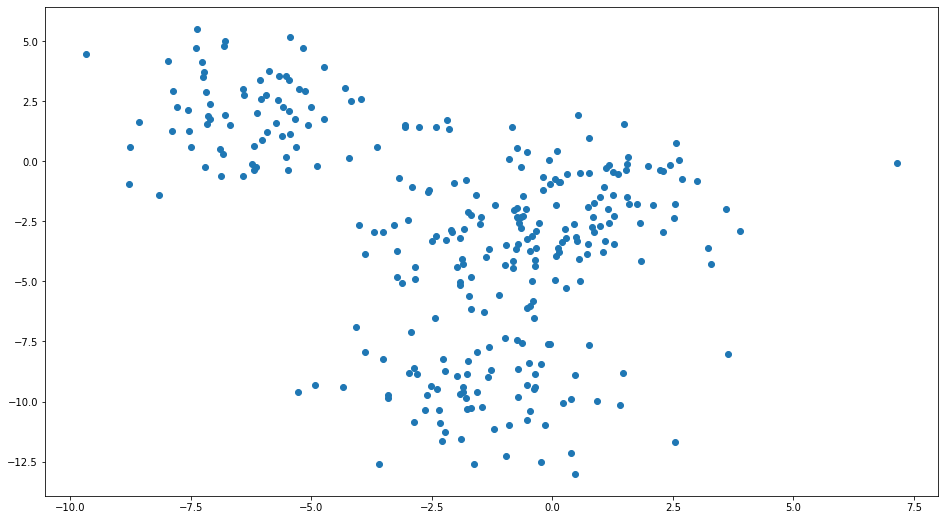

In [ ]:
from sklearn.datasets import make_blobs

cluster_std = 1.5 #@param {type:"slider", min:0.1, max:5, step:0.1}
clusters = 4 #@param {type:"slider", min:1, max:6, step:1}
random_state = 2 #@param {type:"slider", min:1, max:10, step:1}

X, y_true = make_blobs(n_samples=300, centers=clusters,
                       cluster_std=cluster_std, random_state=random_state)

plt.figure(figsize=(16,9))
#plt.scatter(X[:,0],X[:,1],cmap=plt.get_cmap("Accent"),c=y_true)
plt.scatter(X[:,0], X[:,1])
plt.show()

Wählen Sie nun ein geeignetes k und betrachten Sie die Durchführung des k-Means Algorithmus.

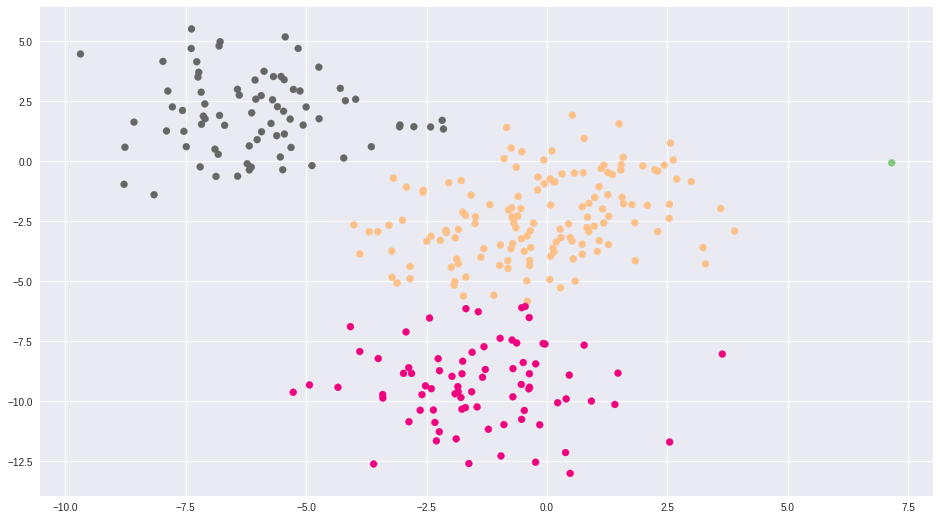

4 clusters found in 6 iterations.


In [ ]:
max_x=X[:,0].max()
min_x=X[:,0].min()
max_y=X[:,1].max()
min_y=X[:,1].min()

k = 4 #@param {type:"slider", min:1, max:10, step:1}
max_iter = 25 #@param {type:"slider", min:10, max:100, step:5}

centers=np.random.uniform(size=(k,2))
centers*=np.array([np.abs(max_x-min_x),np.abs(max_y-min_y)])
centers+=np.array([min_x,min_y])

z = 0
clusters_found = False

while z<max_iter and not clusters_found:
    display.clear_output(wait=True)
    time.sleep(1.0)
    
    plt.figure(figsize=(16,9))
    plt.scatter(X[:,0],X[:,1])
    plt.scatter(centers[:,0],centers[:,1],cmap=plt.get_cmap("Accent"),c=range(len(centers)), edgecolor="black",linewidth=2, s=200, zorder=100)

    center_points=[[] for c in centers]

    for i in range(X.shape[0]):
        center=np.argmin(np.sqrt(np.sum(np.square(X[i,:]-centers),axis=1)))
        center_points[center].append(X[i])
        plt.plot([centers[center,0],X[i,0]],[centers[center,1],X[i,1]], color="black", linewidth=.2, zorder=1)
    

    center_points=[np.array(center_points[c]) for c in range(len(center_points))]
    
    new_centers = []
    for i in range(len(center_points)):
      cluster = center_points[i]
      if len(cluster) > 0:
        new_centers.append(cluster.mean(axis=0))
      else:
        new_centers.append(centers[i])
    
    #new_centers=np.array([c.mean(axis=0) for c in center_points])
    #new_centers=[new_centers[i] if  not np.isnan(new_centers[i]).all() else centers[i] for i in range(len(centers))]
    new_centers=np.array(new_centers)
    #new_centers=new_centers.swapaxes(0,1)
    plt.scatter(new_centers[:,0],new_centers[:,1],cmap=plt.get_cmap("Accent"),c=range(len(new_centers)), edgecolor="black",linewidth=2, s=200, zorder=50, alpha=.5)

    clusters_found = True
    for i in range(len(new_centers)):
        dtx,dty=new_centers[i,0]-centers[i,0],new_centers[i,1]-centers[i,1]
        if np.abs(dtx+dty)>0:
            #plt.arrow(centers[i,0],centers[i,1],dtx,dty,width=.05, color="red",length_includes_head=True, zorder=70)
            plt.annotate('', new_centers[i], centers[i],arrowprops=dict(arrowstyle='->', linewidth=3, color="red"))
            clusters_found = False

    #plt.scatter(centers[:,0],centers[:,1],cmap=plt.get_cmap("Accent"),c=range(len(centers)), edgecolor="black",linewidth=2, s=200)

    plt.show()
    centers=new_centers
    z += 1
  
time.sleep(1.0)
display.clear_output(wait=True)
  
cluster_arg=[np.argmin(np.sqrt(np.sum(np.square(X[i,:]-centers),axis=1))) for i in range(len(X))]
plt.figure(figsize=(16,9))
plt.scatter(X[:,0],X[:,1],cmap=plt.get_cmap("Accent"),c=cluster_arg)
plt.show()

if clusters_found:
  print(str(k) + ' clusters found in ' + str(z) + ' iterations.')
else:
  print(str(k) + ' cluster centers did not converge after ' + str(z) + ' iterations')

** 7. Beschreiben Sie die Funktionsweise von k-Means. ** 

ANTWORT...

# Principal Component Analysis (PCA)

Mithilfe der PCA können Mehrdimensionale Daten in niedrigeren Dimensionen abgebildet werden.

** 8. Was spricht dagegen einfach Dimensionen wegzulassen? **

ANTWORT...

Das abgebildete 3-dimensionale Datenset soll nun mit zwei Dimensionen dargestellt werden. Mithilfe der Slider können Sie das Datenset aus verschiedenen Perspektiven betrachten. 

In [ ]:
mu_x = 0
sigma_x = 5
mu_y = 0
sigma_y = 5
mu_z = 0
sigma_z = 1

mu_x_2 = -10
sigma_x_2 = 2
mu_y_2 = 10
sigma_y_2 = 2
mu_z_2 = -10
sigma_z_2 = 2

xx2 = np.random.normal(mu_x_2, sigma_x_2, 100).reshape(-1,1)
yy2 = np.random.normal(mu_y_2, sigma_y_2, 100).reshape(-1,1)
zz2 = np.random.normal(mu_z_2, sigma_z_2, 100).reshape(-1,1)


xx = np.random.normal(mu_x, sigma_x, 1000).reshape(-1,1)
yy = np.random.normal(mu_y, sigma_y, 1000).reshape(-1,1)
zz = np.random.normal(mu_z, sigma_z, 1000).reshape(-1,1)

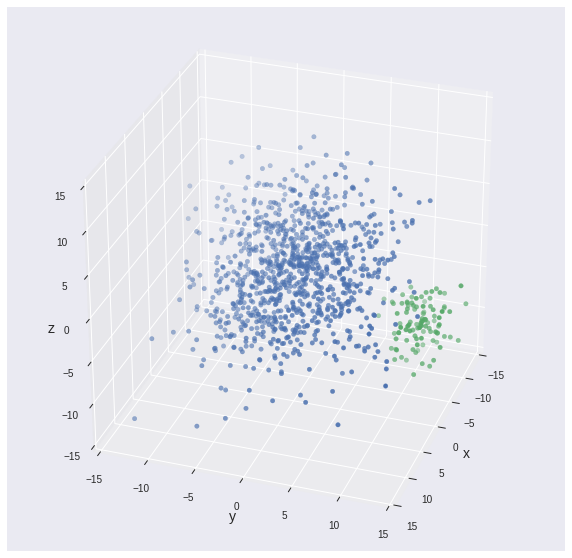

In [ ]:
# pca
# 2D plot

rotation_angle = 15 / 180 * np.pi
#rotation_angle = 45
rotation_mat_z = [[np.cos(rotation_angle), -np.sin(rotation_angle), 0], [np.sin(rotation_angle), np.cos(rotation_angle), 0], [0, 0, 1]]

rotation_angle = -45 / 180 * np.pi

rotation_mat_y = [[np.cos(rotation_angle), 0, np.sin(rotation_angle)], [0, 1, 0], [-np.sin(rotation_angle), 0, np.cos(rotation_angle)]]

data_mat = np.concatenate((xx, yy, zz), axis=1)
data_mat_2 = np.concatenate((xx2, yy2, zz2), axis=1)

res = np.matmul(data_mat, rotation_mat_y)
res = np.matmul(res, rotation_mat_z)

yaw_angle = 19 #@param {type:"slider", min:0, max:90, step:1}
tilt_angle = 30 #@param {type:"slider", min:0, max:90, step:1}

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_xlim3d(-15, 15)
ax.set_ylim3d(-15, 15)
ax.set_zlim3d(-15, 15)

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14)

ax.scatter(res[:,0], res[:,1], res[:,2])
ax.scatter(xx2, yy2, zz2)
ax.view_init(tilt_angle, yaw_angle)

** 9. Wie werden die neuen Achsen (Komponenten) von der PCA gewählt? ** 

ANTWORT...

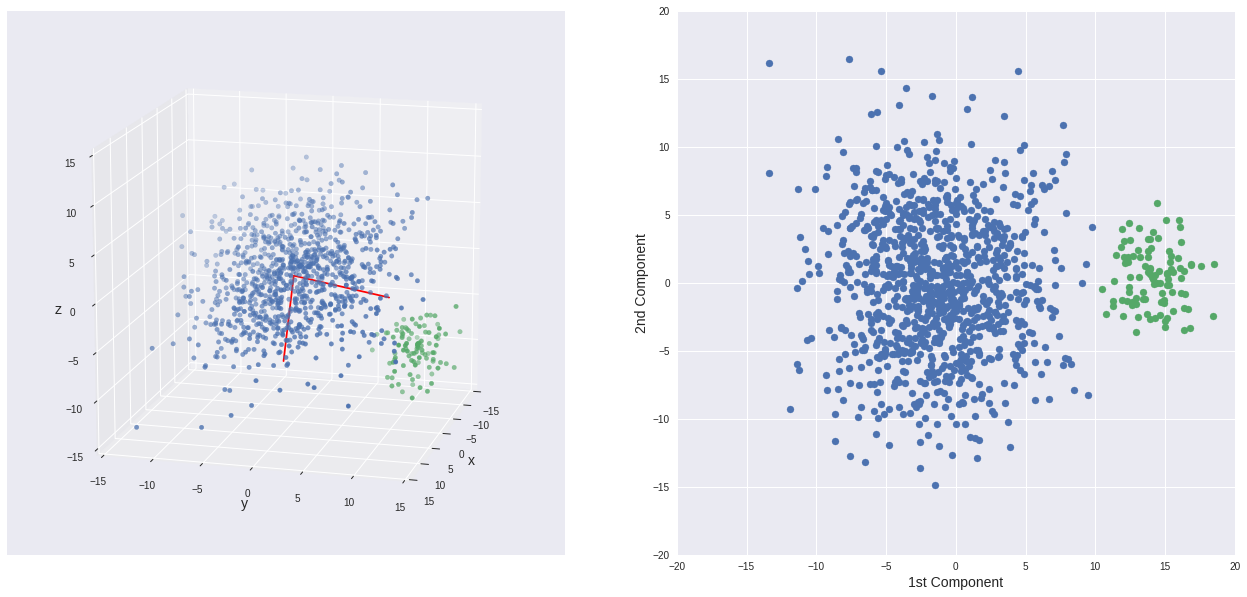

In [ ]:
pca = PCA(n_components=2)

res_transformed = pca.fit_transform(np.concatenate((res, data_mat_2), axis=0))
#pca.components_

yaw_angle = 15 #@param {type:"slider", min:0, max:90, step:1}
tilt_angle = 15 #@param {type:"slider", min:0, max:90, step:1}

fig = plt.figure(figsize=(22,10))
plt.subplot('121', projection='3d')
ax = fig.gca(projection='3d')
ax.set_xlim3d(-15, 15)
ax.set_ylim3d(-15, 15)
ax.set_zlim3d(-15, 15)

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14)

ax.scatter(res[:,0], res[:,1], res[:,2])
ax.scatter(data_mat_2[:,0], data_mat_2[:,1], data_mat_2[:,2])

components = pca.components_
scale = 10
for i in range(len(components)):
  component = components[i]
  ax.plot([0, component[0] * scale], [0, component[1] * scale], [0, component[2] * scale], '-', c='r')
  
ax.view_init(tilt_angle, yaw_angle)

plt.subplot('122')

#plt.title('', fontsize=14)
plt.xlabel('1st Component', fontsize=14)
plt.ylabel('2nd Component', fontsize=14)
plt.scatter(res_transformed[:1000,0], res_transformed[:1000,1])
plt.scatter(res_transformed[1000:,0], res_transformed[1000:,1])
plt.xlim(-20,20)
plt.ylim(-20,20)
print('')